In [2]:
import numpy as np
from ROOT import TEfficiency

# from scipy.stats import binomtest

import matplotlib.pyplot as plt


In [3]:
def simple_n1errovern(n1, n):
    return np.sqrt(n1)/n

def simple_n1err(n1, n):
    n2 = n - n1
    dn1 = np.sqrt(n1)
    err = np.abs(n2*dn1 / n**2)
    return err


def simple_err(n1, n):
    err = None
    n2 = n - n1
    dn1 = np.sqrt(n1)
    dn2 = np.sqrt(n2)
    err2 = (n1*dn2 /n**2)**2
    err2 += simple_n1err(n1, n)**2
    err = np.sqrt(err2)
    return err

def binomerr_root(n1, n):
    upper = TEfficiency.ClopperPearson(n, n1, 0.6827, True)
    lower = TEfficiency.ClopperPearson(n, n1, 0.6827, False)
    return np.max([upper-n1/n, n1/n-lower])

binomerr = np.vectorize(binomerr_root)

# def binomerr_scipy(n1, n):
#     result = binomtest(k=n1, n=n, p=0.5, alternative='two-sided')
#     upper = result.proportion_ci(confidence_level=0.6827, method='exact').high
#     lower = result.proportion_ci(confidence_level=0.6827, method='exact').low
#     return np.max([upper-n1/n, n1/n-lower])

# binomerr = np.vectorize(binomerr_scipy)

In [4]:
def plot_eratio(n, p1, p2, e1, e2, erstr):
    fig, ax = plt.subplots()
    x = np.fromiter((i for i in range(int(p1*n), int(p2*n))), dtype=np.int32)
    plt.hist(e1(x, n)/e2(x, n))
    plt.annotate("Prob. from {:.3f} to {:.3f}".format(p1, p2), xy=(0.05, 0.95), xycoords='axes fraction')
    plt.xlabel(erstr)

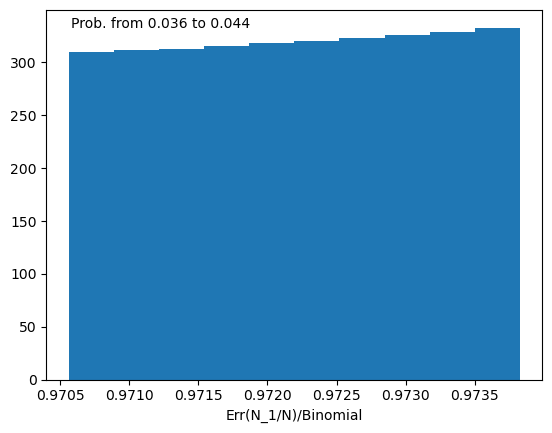

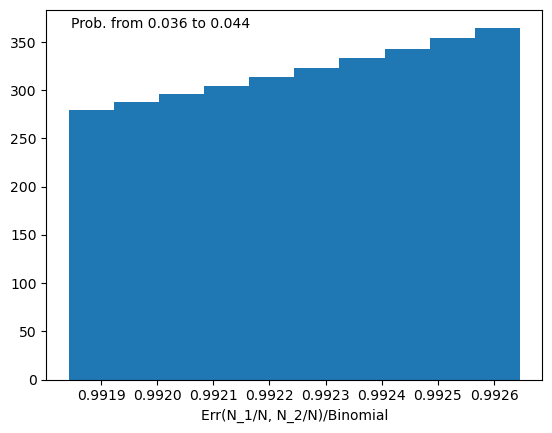

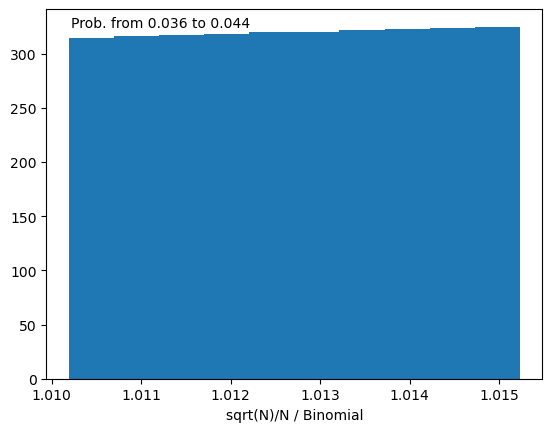

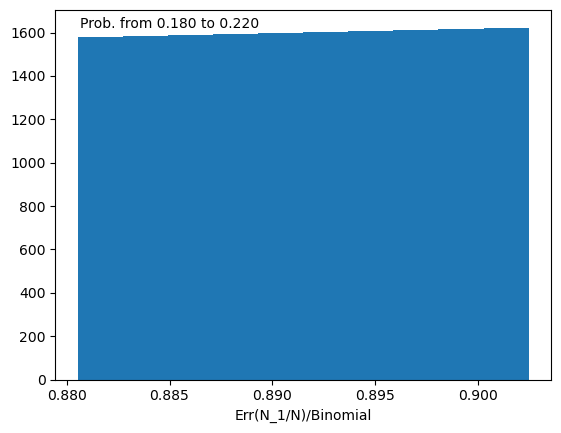

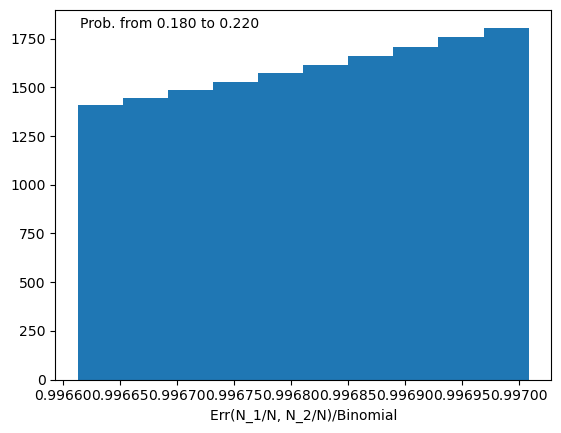

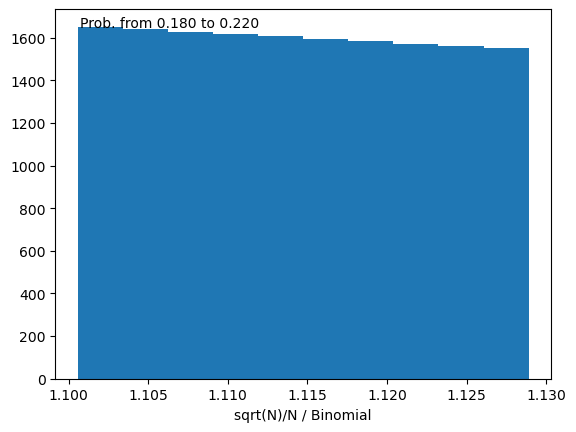

In [5]:
def p_range(n1, n):
    plow = n1/n*0.9
    phigh = np.min([1, n1/n*1.1])
    return plow, phigh


# sample size 400_000
n = 400_000

# 25 pieces
n1 = int(n/25)

plow, phigh = p_range(n1, n)

plot_eratio(n, plow, phigh, simple_n1err, binomerr, "Err(N_1/N)/Binomial")
plot_eratio(n, plow, phigh, simple_err, binomerr, "Err(N_1/N, N_2/N)/Binomial")
plot_eratio(n, plow, phigh, simple_n1errovern, binomerr, "sqrt(N)/N / Binomial")


# 5 pieces
n1 = int(n/5)
plow, phigh = p_range(n1, n)

plot_eratio(n, plow, phigh, simple_n1err, binomerr, "Err(N_1/N)/Binomial")
plot_eratio(n, plow, phigh, simple_err, binomerr, "Err(N_1/N, N_2/N)/Binomial")
plot_eratio(n, plow, phigh, simple_n1errovern, binomerr, "sqrt(N)/N / Binomial")